In [1]:
from utils import get_omic_graph 
from discovery import get_topk_ac
import pandas as pd 
from basic import multiomics 
import torch
import torch_geometric.utils as geom_utils 
import torch_geometric.data as geom_data

fea1_ac_filepath = r'./david/ac_rule_1.tsv'
fea1_data_filepath = r'./BRCA/1_tr.csv'
fea1_conversion_filepath = r'./david/1_featname_conversion.csv'

fea2_ac_filepath = r'./david/ac_rule_2.tsv'
fea2_data_filepath = r'./BRCA/2_tr.csv'
fea2_conversion_filepath = r'./david/2_featname_conversion.csv'

fea3_ac_filepath = r'./david/ac_rule_3.tsv'
fea3_data_filepath = r'./BRCA/3_tr.csv'
fea3_conversion_filepath = r'./david/3_featname_conversion.csv'

feat1_data_test_filepath = r'./BRCA/1_te.csv'
feat2_data_test_filepath = r'./BRCA/2_te.csv'
feat3_data_test_filepath = r'./BRCA/3_te.csv'

label_filepath = r'./BRCA/labels_tr.csv'
label_test_filepath = r'./BRCA/labels_te.csv'

In [2]:
def intersection(x):
    distinct_genes = set().union(x['genes'])
    
    if len(x['ppi_genes']) > 0:
        distinct_genes = distinct_genes.intersection(x['ppi_genes'])
    
    if len(x['kegg_go_genes']) > 0 :
        distinct_genes = distinct_genes.intersection(x['kegg_go_genes'])
        
    return distinct_genes

def get_common_genes(ac_filepath , data_filepath , conversion_filepath , label_filepath , visualize=False):
    topk = get_topk_ac(ac_filepath, data_filepath, label_filepath, False)
    _ , _ , _ , _ , _ , ( ppi_gene_set , kegg_go_gene_set , _ ) = get_omic_graph(data_filepath , conversion_filepath , ac_filepath , label_filepath , False , None , None , 0.0 , True , True , False)

    topk['ppi_genes'] = pd.Series([ set(ppi_gene_set) ] * len(topk)) 
    topk['ppi_genes_count'] = topk['ppi_genes'].apply(lambda x : len(x))

    topk['kegg_go_genes'] = pd.Series([ set(kegg_go_gene_set) ] * len(topk))
    topk['kegg_go_genes_count'] = topk['kegg_go_genes'].apply(lambda x : len(x))

    # convert
    topk['genes'] = topk['genes'].apply(lambda x : set([int(y) for y in list(x)]))

    # intersection between ppi and kegg_go and gene 
    topk['common_genes'] = topk.apply(lambda x : intersection(x) , axis = 1)
    topk['common_genes_count'] = topk.apply(lambda x : len(x['common_genes']) , axis = 1)

    if visualize:
        topk.plot(x = 'k' , y = ['svm_score' , 'common_genes_count'] , secondary_y=['svm_score'])
        
    return topk


In [3]:
df_fea1 = get_common_genes(fea1_ac_filepath , fea1_data_filepath , fea1_conversion_filepath , label_filepath , False)
df_fea2 = get_common_genes(fea2_ac_filepath , fea2_data_filepath , fea2_conversion_filepath , label_filepath , False)
df_fea3 = get_common_genes(fea3_ac_filepath , fea3_data_filepath , fea3_conversion_filepath , label_filepath , False)

Generate top best K for class: 1.0


100%|██████████| 100/100 [00:00<00:00, 3697.67it/s]


Generate top best K for class: 4.0


100%|██████████| 100/100 [00:00<00:00, 2423.89it/s]


Generate top best K for class: 3.0


100%|██████████| 100/100 [00:00<00:00, 3265.75it/s]


Generate top best K for class: 0.0


100%|██████████| 100/100 [00:00<00:00, 1755.64it/s]


Generate top best K for class: 2.0


100%|██████████| 100/100 [00:00<00:00, 4167.22it/s]


/home/tchiayan/gnn/discovery.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.7317073170731707' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topk_agg.loc[idx , 'svm_score'] = clf.score(X_test, y_test)
Generate graph data: 100%|██████████| 612/612 [00:11<00:00, 52.61it/s]


Generate top best K for class: 1.0


100%|██████████| 100/100 [00:00<00:00, 1919.96it/s]


Generate top best K for class: 0.0


100%|██████████| 100/100 [00:00<00:00, 1212.15it/s]


Generate top best K for class: 3.0


100%|██████████| 100/100 [00:00<00:00, 2454.20it/s]


Generate top best K for class: 4.0


100%|██████████| 100/100 [00:00<00:00, 1928.87it/s]
/home/tchiayan/gnn/discovery.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6504065040650406' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topk_agg.loc[idx , 'svm_score'] = clf.score(X_test, y_test)
Generate graph data: 100%|██████████| 612/612 [00:08<00:00, 69.22it/s]


Generate top best K for class: 0.0


100%|██████████| 100/100 [00:00<00:00, 1798.41it/s]


Generate top best K for class: 1.0


100%|██████████| 100/100 [00:00<00:00, 3760.22it/s]


Generate top best K for class: 3.0


100%|██████████| 100/100 [00:00<00:00, 3478.59it/s]


Generate top best K for class: 4.0


100%|██████████| 100/100 [00:00<00:00, 2343.63it/s]


Generate top best K for class: 2.0


100%|██████████| 100/100 [00:00<00:00, 3645.70it/s]
/home/tchiayan/gnn/discovery.py:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6585365853658537' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topk_agg.loc[idx , 'svm_score'] = clf.score(X_test, y_test)
Generate graph data: 100%|██████████| 612/612 [00:02<00:00, 286.71it/s]


k          99.000000
score       0.688347
score_1     0.739837
score_2     0.674797
score_3     0.650407
Name: 98, dtype: float64

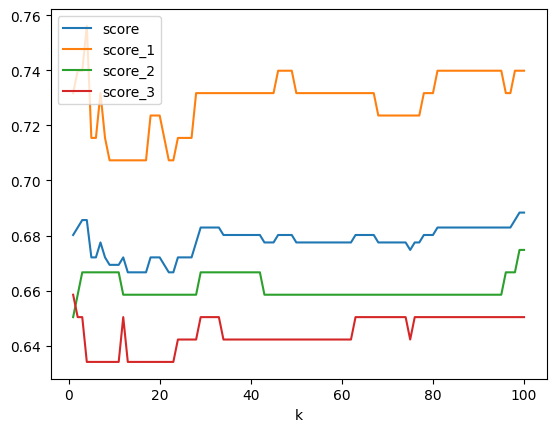

In [4]:
df = pd.DataFrame()
df = df_fea1[['k']].copy()
df['score'] = (df_fea1['svm_score'] + df_fea2['svm_score'] + df_fea3['svm_score']) / 3
df['score_1'] = df_fea1['svm_score']
df['score_2'] = df_fea2['svm_score']
df['score_3'] = df_fea3['svm_score']
df.plot(x = 'k' , y = ['score','score_1','score_2','score_3'])

# get max score row 
df.loc[df['score'].idxmax()]

Generate graph data: 100%|██████████| 263/263 [00:01<00:00, 232.75it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/tchiayan/anaconda3/envs/gnn/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/home/tchiayan/anaconda3/envs/gnn/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


/home/tchiayan/gnn/basic.py:277: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  acc = self.acc(torch.nn.functional.softmax(output) , y1)
/home/tchiayan/gnn/basic.py:278: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  f1 = self.f1(torch.nn.functional.softmax(output) , y1)
/home/tchiayan/gnn/basic.py:279: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  auroc = self.auc(torch.nn.functional.softmax(output) , y1)
/home/tchiayan/anaconda3/envs/gnn/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/home/tchiayan/gnn/basic.py:280: UserWarning: Implicit dimension choice for softma

Epoch 0:   0%|          | 0/30 [00:00<?, ?it/s] 

/home/tchiayan/gnn/basic.py:262: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  acc = self.acc(torch.nn.functional.softmax(output) , y1)


Epoch 9: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s, v_num=230, val_loss=0.679, val_acc=0.800, val_f1=0.716, val_auroc=0.860, val_spe=0.950, val_sen=0.800, train_loss=0.411, train_acc=0.932]  

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 30/30 [00:08<00:00,  3.56it/s, v_num=230, val_loss=0.679, val_acc=0.800, val_f1=0.716, val_auroc=0.860, val_spe=0.950, val_sen=0.800, train_loss=0.411, train_acc=0.932]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/tchiayan/anaconda3/envs/gnn/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 14/14 [00:01<00:00,  7.45it/s]


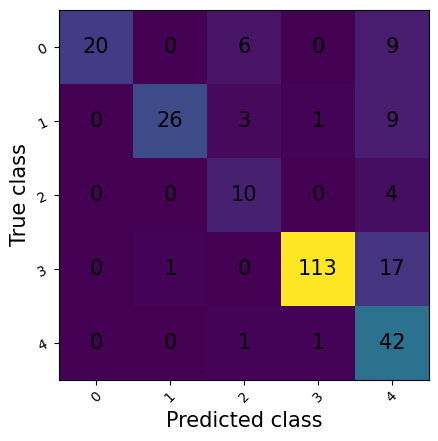

In [5]:


labels = [ label_filepath , label_test_filepath ]
train_data = [ fea1_data_filepath , fea2_data_filepath , fea3_data_filepath ]
test_data = [ feat1_data_test_filepath , feat2_data_test_filepath , feat3_data_test_filepath ]
ac_files = [ fea1_ac_filepath , fea2_ac_filepath , fea3_ac_filepath ]
conversion_files = [ fea1_conversion_filepath , fea2_conversion_filepath , fea3_conversion_filepath ]

biomarkers , gp_trains , gp_tests = multiomics(train_data , test_data , conversion_files , ac_files , labels , ppi=True , kegg_go=True , corr=False , ac=True , topk=50 , disable_tracking=True , max_epoch=10 , remove_isolated_node=False)

In [6]:
perm1 , perm2 , score1, score2 , batch1 , batch2 = biomarkers['omic1']
dense_batch , mask = geom_utils.to_dense_batch(perm1 , batch1 , batch_size=20 , max_num_nodes=500)

dense_batch # size => batch_size x max_num_nodes x num_features 

# check any False in mask 
print(mask.sum(dim=1))
print(dense_batch.shape)

tensor([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500], device='cuda:0')
torch.Size([20, 500])


In [7]:
omic_graph = gp_trains[0]

In [8]:
dense_graph = geom_data.Batch.from_data_list(omic_graph[:20])
print(biomarkers['omic3'][0])
print(dense_graph)
print(batch1.shape)

tensor([ 212,  283,  346,  ..., 9569, 9733, 9747], device='cuda:0')
DataBatch(x=[20000, 1], edge_index=[2, 6460280], edge_attr=[6460280, 1], y=[20], num_nodes=20000, extra_label=[20000], batch=[20000], ptr=[21])
torch.Size([10000])


In [9]:
ranked = dense_graph.extra_label[perm1.cpu()].view(20 , 500) # batch , selected_genes_index
score = score1.cpu().view(20 , 500)

genes = torch.zeros(20 , 1000)

# given ranked contain index of selected genes
# we need to put score to original gene 

for i in range(20):
    genes[i , ranked[i]] = score[i]
    

In [26]:
discovery_genes , genes_score = genes.mean(dim=0).topk(1000)

In [27]:
print(discovery_genes)
print(genes_score)

tensor([ 1.0000e+00,  9.9999e-01,  9.9999e-01,  9.9998e-01,  9.9993e-01,
         9.9987e-01,  9.9986e-01,  9.9912e-01,  9.9740e-01,  9.8786e-01,
         9.8112e-01,  9.8000e-01,  9.7409e-01,  9.4872e-01,  9.4855e-01,
         9.1215e-01,  8.9751e-01,  8.9196e-01,  8.3876e-01,  8.0545e-01,
         8.0469e-01,  7.9798e-01,  7.8723e-01,  7.8249e-01,  7.6898e-01,
         7.5000e-01,  7.4476e-01,  7.2207e-01,  6.9798e-01,  6.8052e-01,
         5.7023e-01,  5.4473e-01,  5.3274e-01,  5.3242e-01,  5.2443e-01,
         4.7683e-01,  4.6225e-01,  4.4961e-01,  4.3842e-01,  4.1969e-01,
         3.9452e-01,  3.8744e-01,  3.8578e-01,  3.6866e-01,  3.5041e-01,
         3.3207e-01,  3.2596e-01,  3.2505e-01,  3.1367e-01,  3.0870e-01,
         3.0538e-01,  3.0463e-01,  2.8929e-01,  2.7779e-01,  2.7320e-01,
         2.6917e-01,  2.6228e-01,  2.6122e-01,  2.6040e-01,  2.5674e-01,
         2.5542e-01,  2.4769e-01,  2.4753e-01,  2.4461e-01,  2.4251e-01,
         2.4243e-01,  2.4131e-01,  2.3310e-01,  2.3

In [23]:
rank2 = dense_graph.extra_label[perm1.cpu()][perm2.cpu()].view(20 , 250)
score2 = score2.cpu().view(20 , 250)

genes2 = torch.zeros(20 , 1000)
for i in range(20):
    genes2[i , rank2[i]] = score2[i]
    
discovery_genes , genes_score = genes2.mean(dim=0).topk(250)
print(discovery_genes)
print(genes_score)

tensor([9.9468e-01, 9.9415e-01, 9.8972e-01, 9.8425e-01, 9.8178e-01, 9.7690e-01,
        9.7528e-01, 9.6495e-01, 8.9986e-01, 8.5561e-01, 8.5524e-01, 8.1224e-01,
        8.0238e-01, 7.6497e-01, 7.5678e-01, 7.4901e-01, 7.4545e-01, 7.1333e-01,
        7.0268e-01, 6.5688e-01, 6.3243e-01, 6.2871e-01, 6.0604e-01, 5.8309e-01,
        5.7790e-01, 5.5238e-01, 5.5037e-01, 5.4703e-01, 5.4623e-01, 5.3879e-01,
        5.2434e-01, 4.9458e-01, 4.8245e-01, 4.6475e-01, 4.6025e-01, 4.5156e-01,
        4.2318e-01, 4.1192e-01, 4.0433e-01, 3.8364e-01, 3.7122e-01, 3.5972e-01,
        3.2069e-01, 3.1523e-01, 3.0819e-01, 3.0811e-01, 2.9638e-01, 2.9254e-01,
        2.8736e-01, 2.7068e-01, 2.6542e-01, 2.5529e-01, 2.4574e-01, 2.3830e-01,
        2.2879e-01, 2.2634e-01, 2.2069e-01, 2.1886e-01, 2.0419e-01, 1.9891e-01,
        1.9831e-01, 1.7488e-01, 1.7466e-01, 1.7044e-01, 1.5053e-01, 1.4972e-01,
        1.2588e-01, 1.2437e-01, 1.2411e-01, 1.2340e-01, 1.2164e-01, 1.1945e-01,
        1.1213e-01, 1.0963e-01, 1.0000e-